In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("Prostate_Cancer.csv")
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


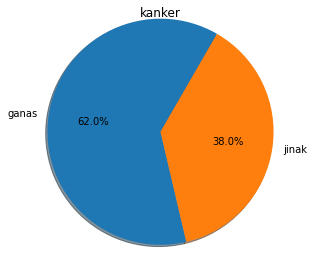

In [ ]:
diagM = [ np.count_nonzero(df['diagnosis_result']=="M"),np.count_nonzero(df['diagnosis_result']=='B')]
hasil = ['ganas','jinak']
plt.title('kanker')
plt.pie(diagM,labels=hasil, radius=1.3, startangle=60, autopct='%.1f%%', shadow=True)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df['diagnosis_result'] = le.fit_transform(df['diagnosis_result'].values)

In [ ]:
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,1,23,12,151,954,0.143,0.278,0.242,0.079
1,2,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,1,14,16,78,386,0.070,0.284,0.260,0.097
4,5,1,9,19,135,1297,0.141,0.133,0.181,0.059


In [ ]:
df.drop (['id'],inplace=True,axis=1)

In [ ]:
df.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,1,14,16,78,386,0.070,0.284,0.260,0.097
4,1,9,19,135,1297,0.141,0.133,0.181,0.059


In [ ]:
xdata= df.loc[:,'radius':'fractal_dimension']
ydata = df['diagnosis_result']
xdata.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151,954,0.143,0.278,0.242,0.079
1,9,13,133,1326,0.143,0.079,0.181,0.057
2,21,27,130,1203,0.125,0.160,0.207,0.060
3,14,16,78,386,0.070,0.284,0.260,0.097
4,9,19,135,1297,0.141,0.133,0.181,0.059


In [ ]:
ydata

0     1
1     0
2     1
3     1
4     1
     ..
95    1
96    0
97    0
98    0
99    1
Name: diagnosis_result, Length: 100, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [ ]:
xtrain, xtest, ytrain,ytest = train_test_split (xdata, ydata, test_size = 0.5, random_state = 5)
xtrain, xtest, ytrain,ytest

(    radius  texture  perimeter  ...  compactness  symmetry  fractal_dimension
 98      21       24         74  ...        0.075     0.162              0.066
 45      18       11        124  ...        0.169     0.191              0.060
 83      20       14        129  ...        0.179     0.163              0.072
 67      18       12         72  ...        0.047     0.152              0.057
 89      12       23         96  ...        0.134     0.212              0.063
 86      19       26         94  ...        0.099     0.208              0.056
 49      25       11         87  ...        0.077     0.181              0.057
 82      10       15        172  ...        0.267     0.183              0.068
 59      23       26         54  ...        0.053     0.168              0.072
 19      17       11         87  ...        0.081     0.189              0.058
 81      17       21         86  ...        0.154     0.194              0.069
 38      11       15         96  ...        0.051   

In [ ]:
ytest

In [ ]:
svm_linear = SVC(C= 1, cache_size=200,
            decision_function_shape='ovr',gamma="auto",kernel='linear',
            max_iter=-1,random_state = None,
            tol = 0.00001, verbose = False)

svm_rbf = SVC(C= 1, cache_size=200,
            decision_function_shape='ovr',gamma="auto",kernel='rbf',
            max_iter=-1,random_state = None,
            tol = 0.00001, verbose = False)

svm_sigmoid = SVC(C= 1, cache_size=200,
            decision_function_shape='ovr',gamma="auto",kernel='sigmoid',
            max_iter=-1,random_state = None,
            tol = 0.00001, verbose = False)

# svm_poly = SVC(C= 1, cache_size=200,
#             decision_function_shape='ovr',gamma="auto",kernel='poly',
#             max_iter=-1,random_state = None,
#             tol = 0.00001, verbose = False)

svm_linear.fit(xtrain,ytrain)
svm_rbf.fit(xtrain,ytrain)
svm_sigmoid.fit(xtrain,ytrain)
# svm_poly.fit(xtrain,ytrain)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=1e-05, verbose=False)

In [ ]:
ypredlinear = svm_linear.predict(xtest)
ypredrbf = svm_rbf.predict(xtest)
ypredsigmoid = svm_sigmoid.predict(xtest)


In [ ]:
from sklearn.metrics import confusion_matrix
tn,fp,fn,tp = confusion_matrix (ytest,ypredlinear).ravel()
akurasi = (tn+tp)/(tn+fp+fn+tp)
print("tn ",tn)
print("fp ",fp)
print("fn ",fn)
print("tp ",tp)
print("akurasi linear ",akurasi)

tn  16
fp  2
fn  2
tp  30
akurasi linear  0.92


In [ ]:




tn,fp,fn,tp = confusion_matrix (ytest,ypredrbf).ravel()
akurasi = (tn+tp)/(tn+fp+fn+tp)
print("akurasi rbf ",akurasi)

tn,fp,fn,tp = confusion_matrix (ytest,ypredsigmoid).ravel()
akurasi = (tn+tp)/(tn+fp+fn+tp)
print("akurasi sigmoid ",akurasi)

akurasi rbf  0.62
akurasi sigmoid  0.64


In [ ]:
predbenar = (ypredlinear == ytest).sum()
predsalah = (ypredlinear != ytest).sum()
print("prediksi benar : ",predbenar, "data")
print("prediksi salah : ",predsalah,"data")
print("akurasi : ",predbenar/(predbenar+predsalah)*100,"%")

prediksi benar :  46 data
prediksi salah :  4 data
akurasi :  92.0 %


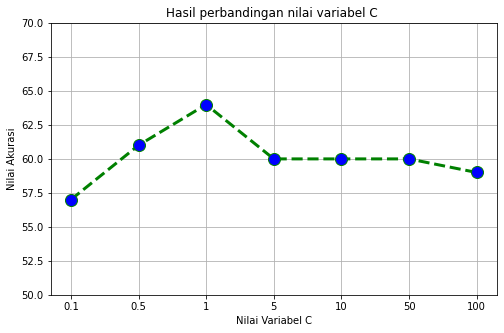

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
y = [57,61,64,60,60,60,59]
x = ['0.1','0.5','1','5','10','50','100']


plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)

plt.ylim(50,70)
plt.xlabel('Nilai Variabel C')
plt.ylabel('Nilai Akurasi')

plt.title('Hasil perbandingan nilai variabel C ')
plt.grid(True)
plt.show()